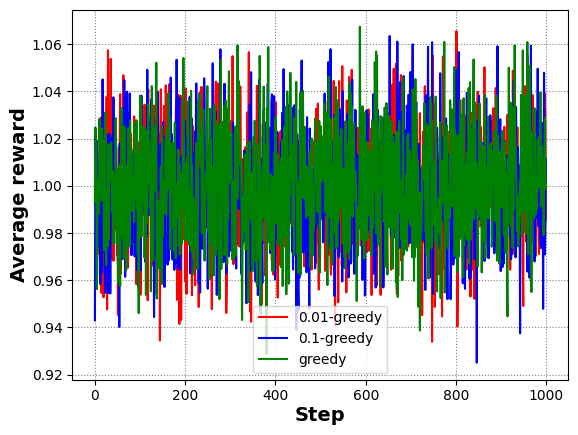

In [1]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

step = 1000
runs = 2000
sigma = 1  # 10-armed testbed 的正态分布标准差
miu_lst = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # 10-armed testbed 的正态分布均值列表


def action_reward(action):  # 10-armed 赌博机testbed，输入动作序号，输出对应的奖励值
    reward = miu_lst[action]+np.random.normal(0, scale=sigma)
    return reward


def random_index(rate):  # 输入概率列表，按照列表的概率输出对应动作的索引
    # """随机变量的概率函数"""
    # 参数rate为list<int>
    # 返回概率动作的下标索引
    start = 0
    index = 0
    randnum = random.randint(1, sum(rate))
    for index, scope in enumerate(rate):
        start += scope
        if randnum <= start:
            break
    return index


def max_index(lst):  # 寻找列表中最大值的索引，如果有多个，则随机输出一个索引
    index_lst = []
    max_n = max(lst)
    for i in range(len(lst)):
        if lst[i] == max_n:
            index_lst.append(i)
    max_index = random.sample(index_lst, 1)
    max_index = max_index[0]
    return max_index


def greedy(epsilon, step, runs):  # 贪婪策略，输入epsilon、步长step、平均奖励列表Q、计数列表N、概率列表P,总独立测试次数，输出平均奖励
    Q_runs_lst = [[] for m in range(runs)]  # 二维列表，存放所有runs的所有step的平均奖励Q
    Q_runs_lst_average = [0 for n in range(step)]  # 一维列表，将 Q_runs_lst 中的所有runs的对应step的Q求平均
    for run_times in range(0, runs):
        Q = [0 for i in range(10)]  # 奖励均值(是用来做greed决策的，而不是最终图里面展示的average reward)
        N = [0 for j in range(10)]  # 计数列表
        P = [0 for k in range(10)]  # 概率列表
        k = 1
        while k <= step:
            for i in range(0, 10):
                P[i] = 1000*epsilon/10
            max_ = max_index(Q)
            P[max_] = 1000 - 1000 * epsilon + P[max_]
            action_id = random_index(P)  # 得到在概率列表P下的动作序号
            N[action_id] = N[action_id] + 1
            act_reward = action_reward(action_id)  # 这一次奖励的数值（用于图像展示）
            Q_runs_lst[run_times].append(act_reward)
            Q[action_id] = Q[action_id] + (1/N[action_id])*(act_reward - Q[action_id])

            k += 1
    # print(Q_runs_lst)
    for i in range(0, step):
        for j in range(0, runs):
            Q_runs_lst_average[i] = Q_runs_lst_average[i] + Q_runs_lst[j][i]
        Q_runs_lst_average[i] = Q_runs_lst_average[i]/runs
    # print(Q_runs_lst_average)
    return Q_runs_lst_average


_001_greedy = greedy(0.01, step, runs)
_010_greedy = greedy(0.1, step, runs)
_000_greedy = greedy(0, step, runs)

x = np.arange(step)
plt.plot(x, _001_greedy, color='red')
plt.plot(x, _010_greedy, color='blue')
plt.plot(x, _000_greedy, color='green')
plt.legend(["0.01-greedy", "0.1-greedy", "greedy"])
plt.grid(color='gray', linestyle=':')
plt.xlabel("Step", fontweight='bold', fontsize=14, labelpad=2)
plt.ylabel('Average reward', fontweight='bold', fontsize=14, labelpad=2)
plt.show()